<a href="https://colab.research.google.com/github/giffariilham/bengkelKoding/blob/main/ujianTengahSemesterDataScience2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**KLASIFIKASI SPESIES PINGUIN**

__Tulis Nama dan Nim__

Nama : Giffari Laksono

NIM : A11.2021.13507

Silahkan buat salinan ke Drive sendiri

`File -> Save copy in drive`

Dalam project kali ini kita akan melakukan klasifikasi menggunakan dataset pinguin

Berikut Link Dataset :  https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data

## **Data Preprocessing**

1. Isi _code-cell_ dibawah dengan kode untuk:
    - **Import library** yang akan digunakan
    - **Membaca dataset** _penguins_size_
    - **Tampilkan 10 sample** dari dataset
    

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('penguins_size.csv')

In [ ]:
df.head(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


2. Isi _code-cell_ dibawah dengan kode untuk:
    - **Mengecek dan menghitung nilai kosong** yang ada pada dataset
    - **Mengecek dan menghitung nilai duplikat** dari dataset
    - **Menghapus nilai kosong dan nilai duplikat** jika ada

In [ ]:
df.isnull().sum()

,0
species,0
island,0
culmen_length_mm,2
culmen_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,10


In [ ]:
df.duplicated().sum()

0

In [ ]:
df_cleaned = df.dropna()
df_cleaned = df_cleaned.drop_duplicates()
print(df_cleaned)

    species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen              39.1             18.7              181.0   
1    Adelie  Torgersen              39.5             17.4              186.0   
2    Adelie  Torgersen              40.3             18.0              195.0   
4    Adelie  Torgersen              36.7             19.3              193.0   
5    Adelie  Torgersen              39.3             20.6              190.0   
..      ...        ...               ...              ...                ...   
338  Gentoo     Biscoe              47.2             13.7              214.0   
340  Gentoo     Biscoe              46.8             14.3              215.0   
341  Gentoo     Biscoe              50.4             15.7              222.0   
342  Gentoo     Biscoe              45.2             14.8              212.0   
343  Gentoo     Biscoe              49.9             16.1              213.0   

     body_mass_g     sex  
0         37

3. Isi _code-cell_ dibawah dengan kode untuk:
    - **Melihat informasi** pada dataset
    - **Mengecek nilai unik** pada kolom bertipe data *object*
  

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
# Cek nilai unik dari setiap kolom bertipe data object
print("\nNilai unik type object:")
print(df['species'].unique())
print(df['island'].unique())
print(df['sex'].unique())


Nilai unik type object:
['Adelie' 'Chinstrap' 'Gentoo']
['Torgersen' 'Biscoe' 'Dream']
['MALE' 'FEMALE' nan '.']


4. Isi _code-cell_ dibawah dengan kode untuk:
    - **Menghitung jumlah value** dalam kolom *sex*
    - **Menghapus kolom *sex* dengan value "."**
    - **Cek apakah kolom sudah terhapus dengan benar** dari dataset


In [ ]:
# Cek jumlah value dari kolom 'sex'
value_counts = df['sex'].value_counts()
print("Jumlah value dalam kolom 'sex':")
print(value_counts)

Jumlah value dalam kolom 'sex':
sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64


<span style="color: red;">***output yang diharapkan*** :</span>

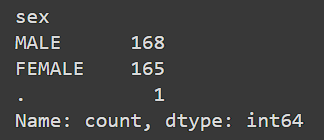

In [ ]:
# Hapus baris data dari kolom 'sex' yang tidak wajar
valid_values = ['MALE', 'FEMALE']

# Menghapus baris yang nilai 'sex' tidak termasuk dalam valid_values
df_cleaned = df[df['sex'].isin(valid_values)]

# Menampilkan DataFrame setelah menghapus nilai tidak wajar
print("\nDataFrame setelah menghapus nilai tidak wajar:")
print(df_cleaned)


DataFrame setelah menghapus nilai tidak wajar:
    species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen              39.1             18.7              181.0   
1    Adelie  Torgersen              39.5             17.4              186.0   
2    Adelie  Torgersen              40.3             18.0              195.0   
4    Adelie  Torgersen              36.7             19.3              193.0   
5    Adelie  Torgersen              39.3             20.6              190.0   
..      ...        ...               ...              ...                ...   
338  Gentoo     Biscoe              47.2             13.7              214.0   
340  Gentoo     Biscoe              46.8             14.3              215.0   
341  Gentoo     Biscoe              50.4             15.7              222.0   
342  Gentoo     Biscoe              45.2             14.8              212.0   
343  Gentoo     Biscoe              49.9             16.1              2

In [ ]:
# Cek ulang jumlah value dari kolom 'sex' (yang sudah dibenahi)
cleaned_value_counts = df_cleaned['sex'].value_counts()
print("\nJumlah value dalam kolom 'sex' setelah penghapusan nilai tidak wajar:")
print(cleaned_value_counts)


Jumlah value dalam kolom 'sex' setelah penghapusan nilai tidak wajar:
sex
MALE      168
FEMALE    165
Name: count, dtype: int64


Output yang diharapkan :

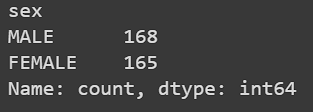

5. Isi _code-cell_ dibawah dengan kode untuk:
    - **Tampilkan apa saja isi dari kolom**

        a. *species*

        b. *island*
        
        c. *sex*

In [ ]:
# Perlihatkan semua nilai unik dari kolom 'species'
print(df_cleaned['species'].unique())

['Adelie' 'Chinstrap' 'Gentoo']


output yang diharapkan :      

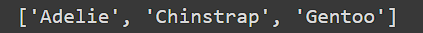

In [ ]:
# Perlihatkan semua nilai unik dari kolom 'island'
print(df_cleaned['island'].unique())

['Torgersen' 'Biscoe' 'Dream']


output yang diharapkan :      

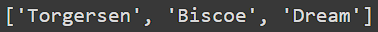

In [ ]:
# Perlihatkan semua nilai unik dari kolom 'sex'
# Expected output : (Tipe data list)
print(df_cleaned['sex'].unique())

['MALE' 'FEMALE']


output yang diharapkan :      

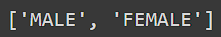

6. Isi _code-cell_ dibawah dengan kode untuk:
    - **Ubah label _species, island dan sex_** menjadi angka
    - **Masukkan hasil labelling** kedalam dataset


In [ ]:
# Buatlah dictionary dengan isi sebagai berikut:

kamusSpesies = {str(TARGET) : INDEX for INDEX, TARGET in enumerate(df_cleaned['species'].unique())}
kamusIsland = {str(TARGET) : INDEX for INDEX, TARGET in enumerate(df_cleaned['island'].unique())}
kamusSex = {str(TARGET) : INDEX for INDEX, TARGET in enumerate(df_cleaned['sex'].unique())}
print(kamusSpesies)
print(kamusIsland)
print(kamusSex)

{'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2}
{'Torgersen': 0, 'Biscoe': 1, 'Dream': 2}
{'MALE': 0, 'FEMALE': 1}


output yang diharapkan :      

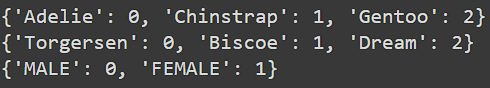

In [ ]:
# Mapping dictionary yang telah dibuat ke dalam data frame dan lihat hasil
df_cleaned['species'] = df_cleaned['species'].map(kamusSpesies)
df_cleaned['island'] = df_cleaned['island'].map(kamusIsland)
df_cleaned['sex'] = df_cleaned['sex'].map(kamusSex)
print(df_cleaned.head())

   species  island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0        0       0              39.1             18.7              181.0   
1        0       0              39.5             17.4              186.0   
2        0       0              40.3             18.0              195.0   
4        0       0              36.7             19.3              193.0   
5        0       0              39.3             20.6              190.0   

   body_mass_g  sex  
0       3750.0    0  
1       3800.0    1  
2       3250.0    1  
4       3450.0    1  
5       3650.0    0  


<ipython-input-68-dbd84ab653b0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['species'] = df_cleaned['species'].map(kamusSpesies)
<ipython-input-68-dbd84ab653b0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['island'] = df_cleaned['island'].map(kamusIsland)
<ipython-input-68-dbd84ab653b0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

__Expected Output dari cell di-atas__

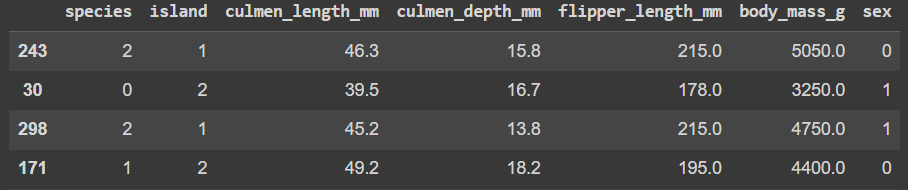

## **VISUALISASI**

7. Isi _code-cell_ dibawah dengan kode untuk:
    - **Buatlah bar plot dari kolom spesies**
    - **Buatlah heatmap** untuk korelasi antar fitur
  

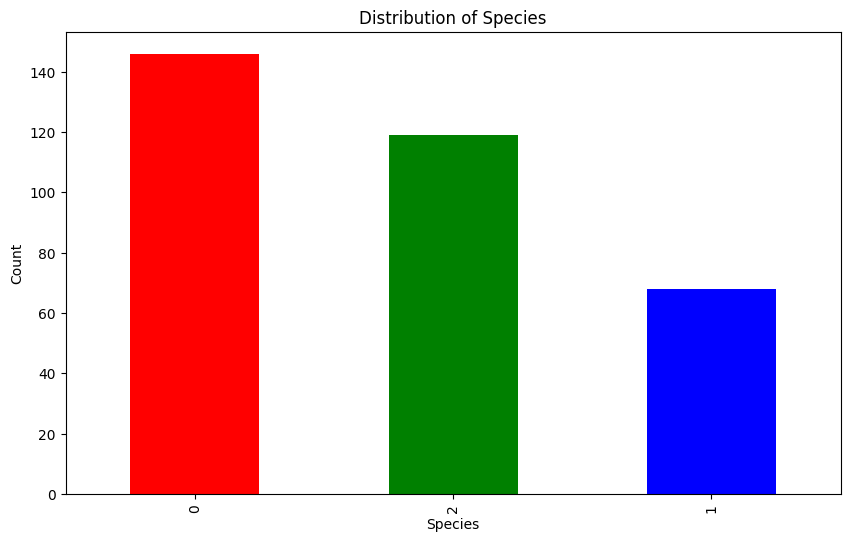

In [ ]:
# Buatlah Bar Plot
plt.figure(figsize=(10, 6))
df_cleaned['species'].value_counts().plot(kind='bar', color=['red', 'green', 'blue'])
plt.title('Distribution of Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

__Expected Output dari Cell di atas__

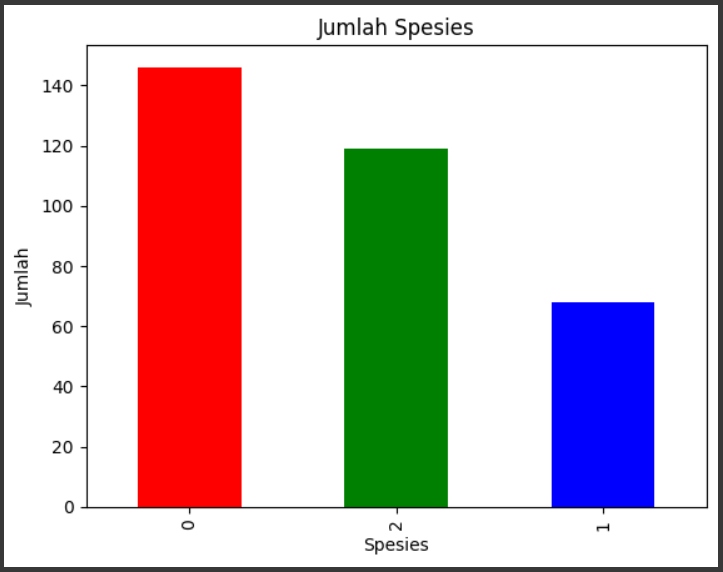

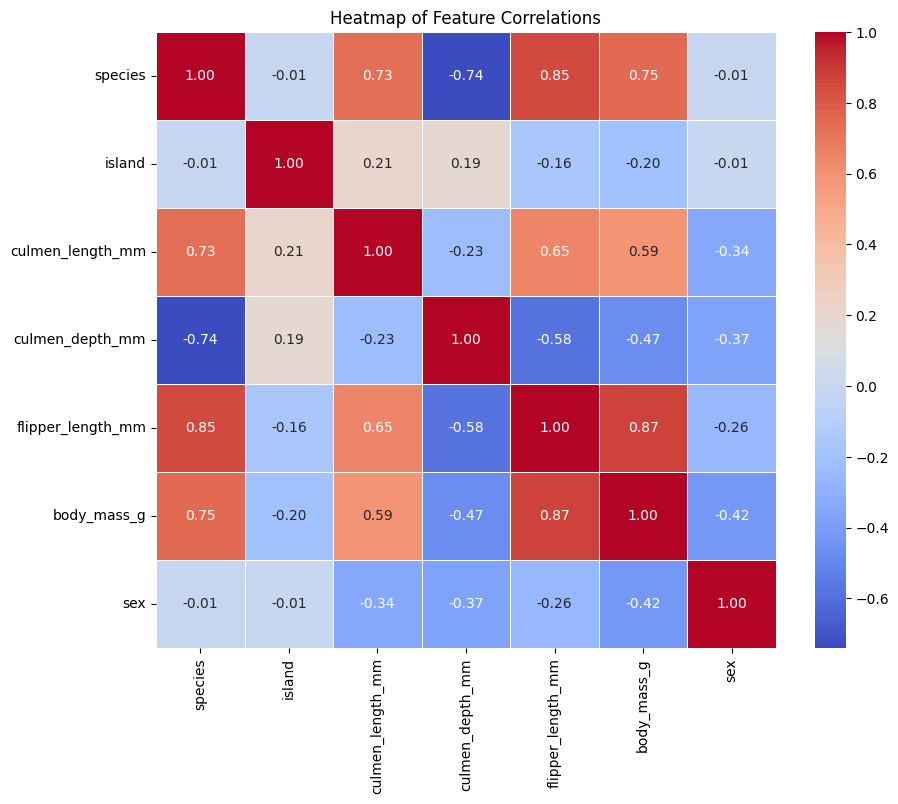

In [ ]:
# Visualisasikan hasil korelasi
# Menghitung matriks korelasi
corr_matrix = df_cleaned.corr()

# Membuat heatmap menggunakan seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Feature Correlations')
plt.show()

__Expected Output dari Cell di Atas__

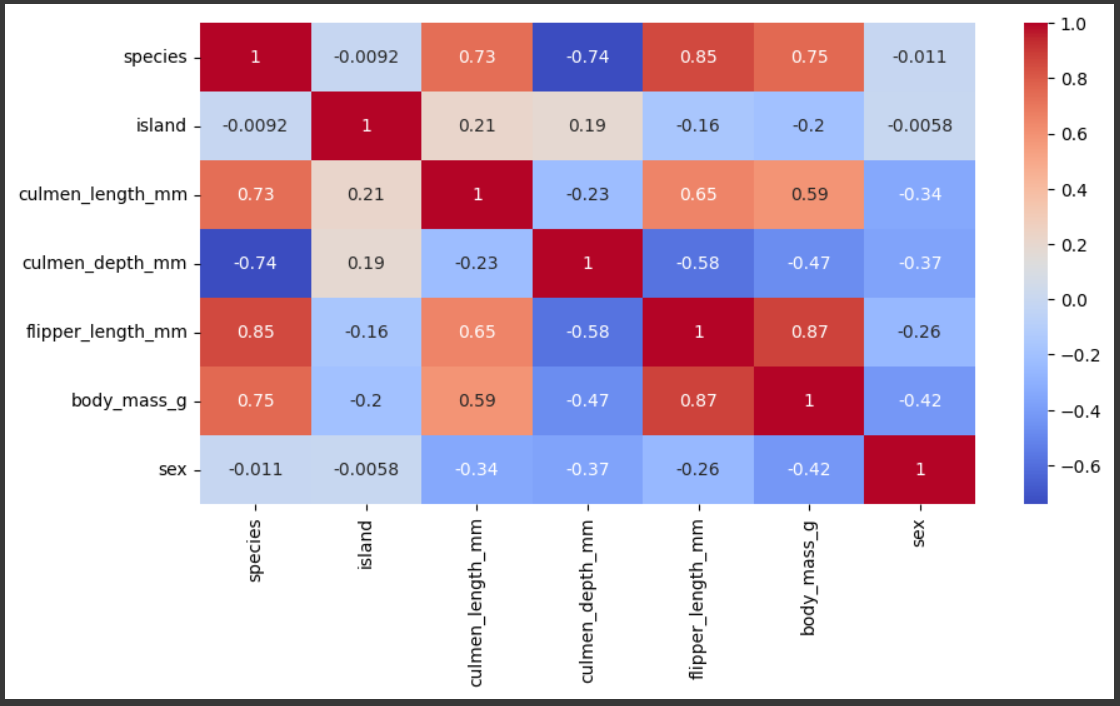

## **FUNCTION YANG BOLEH DIGUNAKAN JIKA MAU**

In [ ]:
# Function
def trainSemua(x_train, y_train):
    knn = KNeighborsClassifier()
    dt = DecisionTreeClassifier()
    nb = GaussianNB()
    knn.fit(x_train, y_train)
    dt.fit(x_train, y_train)
    nb.fit(x_train, y_train)
    return knn, dt, nb

def predikSemua(knn, dt, nb, x_test, y_test):
    knnPred = knn.predict(x_test)
    dtPred = dt.predict(x_test)
    nbPred = nb.predict(x_test)
    knnAcc = accuracy_score(y_test, knnPred)
    dtAcc = accuracy_score(y_test, dtPred)
    nbAcc = accuracy_score(y_test, nbPred)
    return knnAcc, dtAcc, nbAcc

## **MODELLING**

8. **Bagi dataset** menjadi _train-set_ dan _test-set_ dengan ketentuan sebagai berikut:

    a. X = seluruh kolom fitur kecuali kolom target

    b. y = kolom target
    
    c. Bagi dengan rasio 70% _train-set_ dan 30% _test-set_


In [ ]:
# Bagi menjadi fitur dan target
target_column = 'species'  # Ganti dengan nama kolom target yang sesuai
X = df_cleaned.drop(columns=[target_column])
y = df_cleaned[target_column]

In [ ]:
# Split menjadi train dan test sesuai rasio yang disebutkan
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("\nX_train:\n", X_train.head())
print("\ny_train:\n", y_train.head())
print("\nX_test:\n", X_test.head())
print("\ny_test:\n", y_test.head())


X_train:
      island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
27        1              40.5             17.9              187.0   
292       1              48.2             15.6              221.0   
302       1              47.4             14.6              212.0   
62        1              37.6             17.0              185.0   
181       2              52.8             20.0              205.0   

     body_mass_g  sex  
27        3200.0    1  
292       5100.0    0  
302       4725.0    1  
62        3600.0    1  
181       4550.0    0  

y_train:
 27     0
292    2
302    2
62     0
181    1
Name: species, dtype: int64

X_test:
      island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
30        2              39.5             16.7              178.0   
317       1              46.9             14.6              222.0   
79        0              42.1             19.1              195.0   
201       2              49.8             17.3              

9. Buatlah perbandingan model menggunakan algoritma **klasifikasi** antara 2 data yaitu

    a. Data yang di  **NORMALISASI**

    b. Data yang  **BELUM DI NORMALISASI**

    kemudian tampilkan hasil akurasi dari dua dataset tersebut

Akurasi tanpa normalisasi: 0.98
Akurasi dengan normalisasi: 0.99


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
knn, dt, nb = trainSemua('''FIX ME''', '''FIX ME''')

In [ ]:
knnAcc, dtAcc, nbAcc = predikSemua(knn, dt, nb, '''FIX ME''', '''FIX ME''')

In [ ]:
# Deklarasi Scaler dan scale fitur
scaler = StandardScaler()
X_norm = scaler.fit_transform('''FIX ME''')

In [ ]:
# Split ulang menjadi train dan test sesuai rasio yang disebutkan.
# Kali ini menggunakan fitur X yang sudah dinormalisasi
x_trainN, x_testN, y_trainN, y_testN = train_test_split('''FIX ME''', '''FIX ME''', test_size = '''FIX ME''', random_state=42)

In [ ]:
# Cell berikut untuk data yang sudah diNormalisasi
# Boleh mengikuti arahan berikut atau menggunakan cara sendiri

In [ ]:
knnN, dtN, nbN = trainSemua('''FIX ME''', '''FIX ME''')

In [ ]:
knnAccN, dtAccN, nbAccN = predikSemua(knnN, dtN, nbN, '''FIX ME''', '''FIX ME''')

##**EVALUASI**

10. Berikan kesimpulan dari project yang telah anda buat

In [ ]:
# Silahkan komentari dari visualisasi hingga hasil model